# Evaluate CLIP on Test Dataset

- Got inspiration for finteuning here: 
    - https://github.com/sachinruk/blog/blob/master/_notebooks/2021-03-07-CLIP.ipynb
    - https://github.com/huggingface/transformers/blob/main/examples/pytorch/contrastive-image-text/run_clip.py


In [2]:
# you might want to restart the kernel after installation is complete.
!pip install transformers evaluate docarray pillow datasets pycm ipywidgets jupyter evaluate jupyter_client --upgrade --quiet

In [15]:
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
from docarray import DocumentArray

import torch


checkpoint = "vincentclaes/emoji-predictor-few-shot"
K = 4


no_features = range(20) # these are the emoji's we use
emojis_as_images = [Image.open(f"emojis/{i}.png") for i in no_features]

processor = CLIPProcessor.from_pretrained(checkpoint)
model = CLIPModel.from_pretrained(checkpoint)


def get_emoji(text, model=model, processor=processor, emojis=emojis_as_images, K=4):
    inputs = processor(text=text, images=emojis_as_images, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)

    logits_per_text = outputs.logits_per_text
    # we take the softmax to get the label probabilities
    probs = logits_per_text.softmax(dim=1)
    # top K number of options
    predictions_suggestions_for_chunk = [torch.topk(prob, K).indices.tolist() for prob in probs][0]
    predictions_suggestions_for_chunk
    
    # plot predictions
    images = DocumentArray.from_files([f"emojis/{i}.png" for i in predictions_suggestions_for_chunk])
    images.plot_image_sprites()

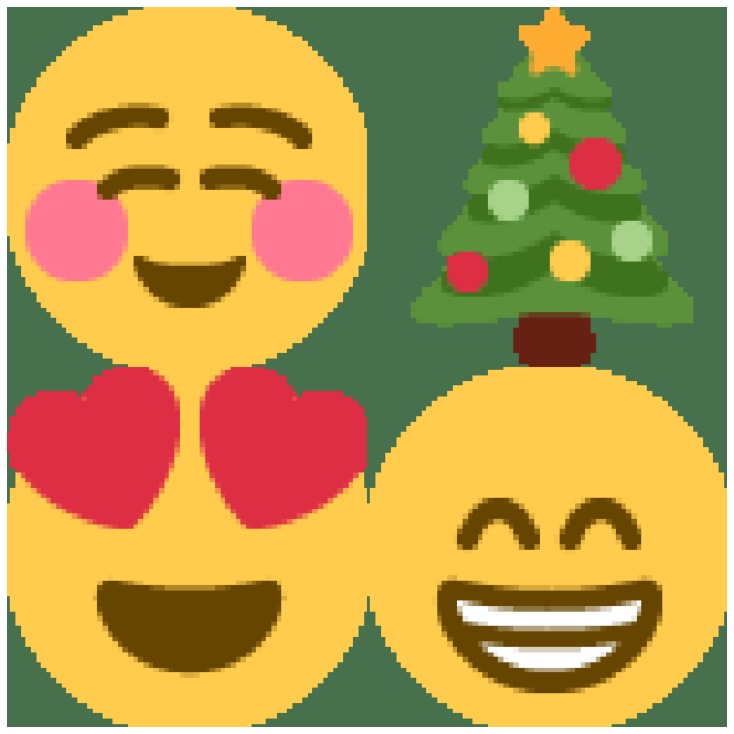

In [13]:
get_emoji(text="I'm so glad I finally arrived in my holiday resort!")

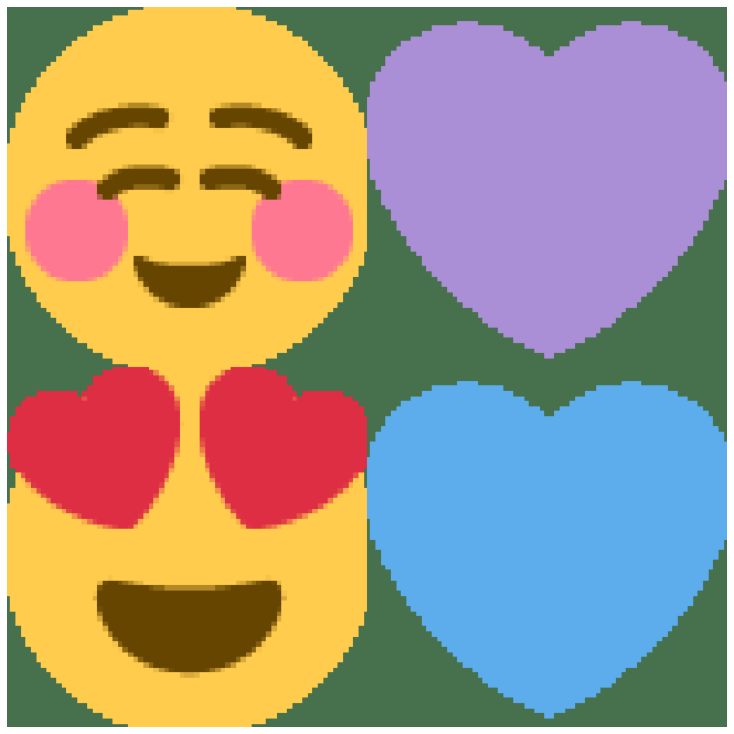

In [16]:
get_emoji(text="I'm feeling sad today")

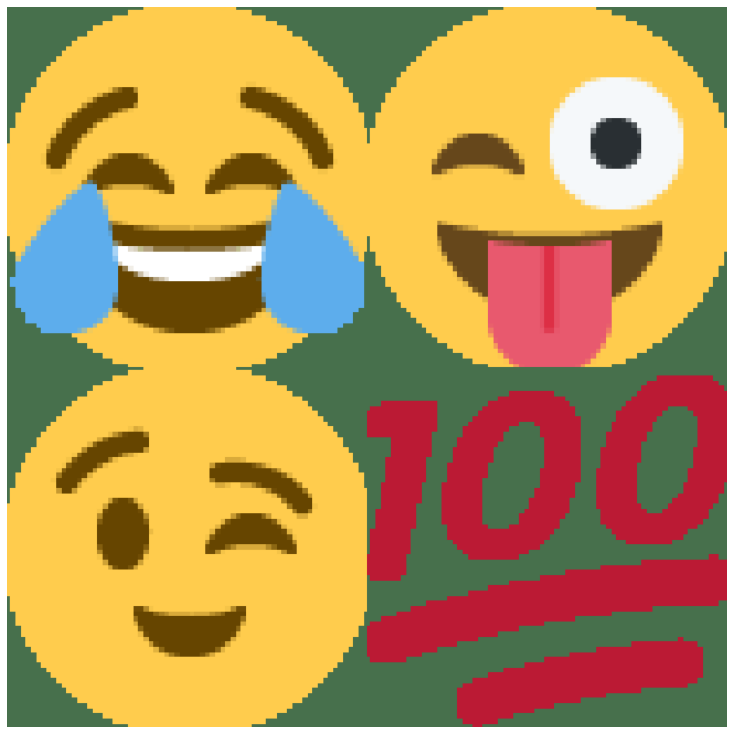

In [18]:
get_emoji(text="I'm dying")